In [2]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
palette = sns.color_palette('viridis')
palette

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

# Networks

In [93]:
N = 100 # Population (Number of nodes)
K = 5 # Half of the desired average degree
wsG = ig.Graph.Watts_Strogatz(dim=1, size=N, nei=K, p=0.5)
erG = ig.Graph.Erdos_Renyi(N, m=K*N)
baG = ig.Graph.Barabasi(N, m=K)

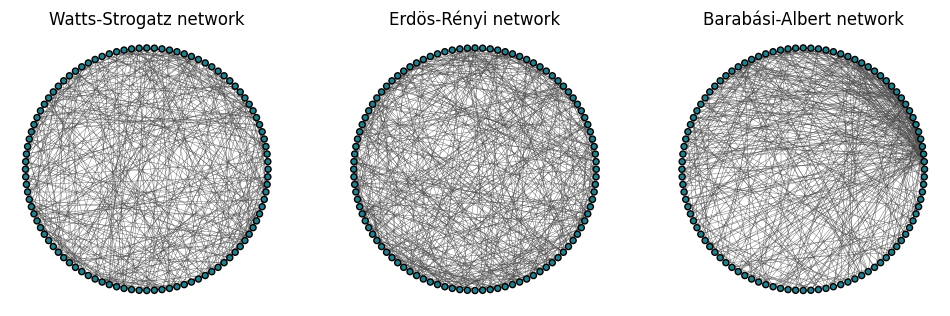

In [94]:
fig, axs = plt.subplots(1,3, figsize=(12,4))

kwargs = dict(layout = 'circular', vertex_size = 0.05, vertex_color=[palette[2]], edge_width = 0.25)

axs[0].set_title('Watts-Strogatz network')
ig.plot(wsG, target=axs[0], **kwargs)
axs[1].set_title('Erdös-Rényi network')
ig.plot(erG, target=axs[1], **kwargs)
axs[2].set_title('Barabási-Albert network')
ig.plot(baG, target=axs[2], **kwargs)

plt.savefig('graphPlots.png', dpi=300)
plt.show()

# Centrality

In [4]:
N = 1000 # Population (Number of nodes)
K = 5 # Half of the desired average degree
wsG = ig.Graph.Watts_Strogatz(dim=1, size=N, nei=K, p=0.5)
erG = ig.Graph.Erdos_Renyi(N, m=K*N)
baG = ig.Graph.Barabasi(N, m=K)

## Degree

In [5]:
degWS = np.array(wsG.vs.degree())
degER = np.array(erG.vs.degree())
degBA = np.array(baG.vs.degree())

print(f'WS mean degree = {degWS.mean()}')
print(f'ER mean degree = {degER.mean()}')
print(f'BA mean degree = {degBA.mean()}\n')

WS mean degree = 10.0
ER mean degree = 10.0
BA mean degree = 9.97



## Betweenness

In [6]:
betweenWS = np.array(wsG.betweenness())
betweenER = np.array(erG.betweenness())
betweenBA = np.array(baG.betweenness())

print(f'WS mean betweenness = {betweenWS.mean()}')
print(f'ER mean betweenness = {betweenER.mean()}')
print(f'BA mean betweenness = {betweenBA.mean()}\n')

WS mean betweenness = 1134.818
ER mean betweenness = 1126.76
BA mean betweenness = 1014.212



## Closeness

In [7]:
closeWS = np.array(wsG.closeness())
closeER = np.array(erG.closeness())
closeBA = np.array(baG.closeness())

print(f'WS mean closeness = {closeWS.mean()}')
print(f'ER mean closeness = {closeER.mean()}')
print(f'BA mean closeness = {closeBA.mean()}\n')

WS mean closeness = 0.3062053510479311
ER mean closeness = 0.307826689052863
BA mean closeness = 0.33199413277307316



## Eigenvector

In [8]:
eigenWS = np.array(wsG.eigenvector_centrality())
eigenER = np.array(erG.eigenvector_centrality())
eigenBA = np.array(baG.eigenvector_centrality())

print(f'WS mean eigenvector = {eigenWS.mean()}')
print(f'ER mean eigenvector = {eigenER.mean()}')
print(f'BA mean eigenvector = {eigenBA.mean()}\n')

WS mean eigenvector = 0.46680810386776145
ER mean eigenvector = 0.40082290825370437
BA mean eigenvector = 0.0910069145553555



## Diameter

In [9]:
print(f'The diameter of WS graph is: {wsG.diameter()}')
print(f'The diameter of ER graph is: {erG.diameter()}')
print(f'The diameter of BA graph is: {baG.diameter()}\n')

The diameter of WS graph is: 6
The diameter of ER graph is: 5
The diameter of BA graph is: 5



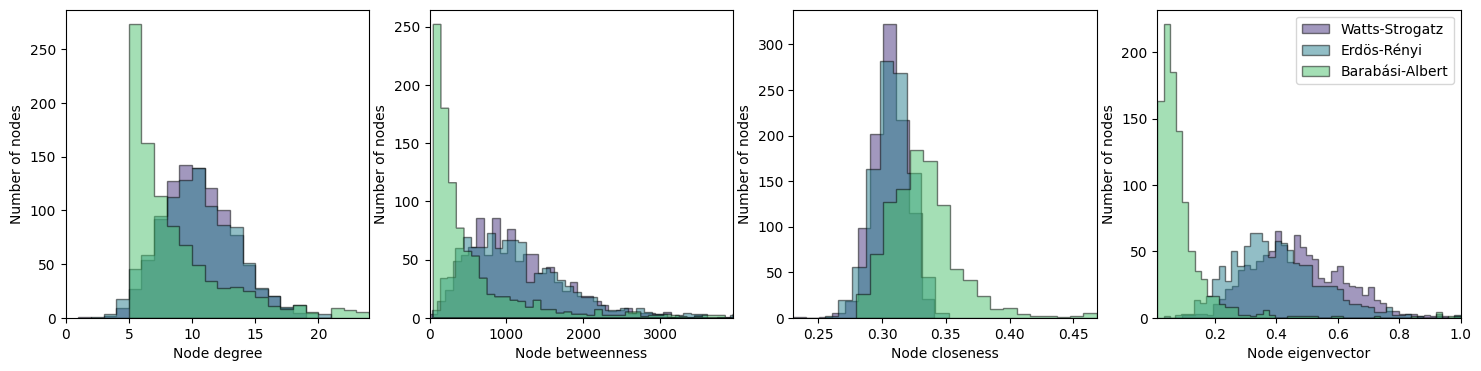

In [11]:
fig, axs = plt.subplots(1,4,figsize=(18,4))

kwargs = dict(density = False, alpha = 0.5, histtype='stepfilled', ec = 'black')

axs[0].hist(degWS, label = 'Watts-Strogatz', bins = degWS.max()-degWS.min(), **kwargs, color=palette[0])
axs[0].hist(degER, label = 'Erdös-Rényi', bins = degER.max()-degER.min(), **kwargs, color=palette[2])
axs[0].hist(degBA, label = 'Barabási-Albert', bins = degBA.max()-degBA.min(), **kwargs, color=palette[4])

axs[0].set_xlim((0,degWS.max()+5))
axs[0].set_xlabel('Node degree')
axs[0].set_ylabel('Number of nodes')

binsWS = int(betweenWS.max()-betweenWS.min())//100
binsER = int(betweenER.max()-betweenER.min())//100
binsBA = int(betweenBA.max()-betweenBA.min())//100

axs[1].hist(betweenWS, label = 'Watts-Strogatz', bins = binsWS, **kwargs, color=palette[0])
axs[1].hist(betweenER, label = 'Erdös-Rényi', bins = binsER, **kwargs, color=palette[2])
axs[1].hist(betweenBA, label = 'Barabási-Albert', bins = binsBA, **kwargs, color=palette[4])

axs[1].set_xlim((0,int(betweenWS.max())))
axs[1].set_xlabel('Node betweenness')
axs[1].set_ylabel('Number of nodes')

binsWS = int((closeWS.max()-closeWS.min())*100)
binsER = int((closeER.max()-closeER.min())*100)
binsBA = int((closeBA.max()-closeBA.min())*100)

axs[2].hist(closeWS, label = 'Watts-Strogatz', bins = binsWS, **kwargs, color=palette[0])
axs[2].hist(closeER, label = 'Erdös-Rényi', bins = binsER, **kwargs, color=palette[2])
axs[2].hist(closeBA, label = 'Barabási-Albert', bins = binsBA, **kwargs, color=palette[4])

axs[2].set_xlim((closeWS.min(),closeBA.max()))
axs[2].set_xlabel('Node closeness')
axs[2].set_ylabel('Number of nodes')

binsWS = int((eigenWS.max()-eigenWS.min())*50)
binsER = int((eigenER.max()-eigenER.min())*50)
binsBA = int((eigenBA.max()-eigenBA.min())*50)

axs[3].hist(eigenWS, label = 'Watts-Strogatz', bins = binsWS, **kwargs, color=palette[0])
axs[3].hist(eigenER, label = 'Erdös-Rényi', bins = binsER, **kwargs, color=palette[2])
axs[3].hist(eigenBA, label = 'Barabási-Albert', bins = binsBA, **kwargs, color=palette[4])

axs[3].set_xlim((eigenBA.min(),eigenBA.max()))
axs[3].set_xlabel('Node eigenvector')
axs[3].set_ylabel('Number of nodes')

plt.legend()
plt.savefig('centrality.pdf')
plt.show()

# Epidemiologic simulation within contact networks

## SIR model

In [12]:
def simEpi(G, time = 365, initInfec = 1, beta = 0.22, infecTime = 14):
    G.vs["state"] = "S"       # Set nodes as Susceptible state
    G.vs["infecTime"] = 0     # Set the infected time of the nodes to 0

    # Set the inital infected nodes as node state
    pop = G.vcount()          # Get number of nodes (Population)
    for i in range(0,initInfec):
        # select a random node and chage its state to Infected if it was not already infected
        id = np.random.randint(0, pop)
        while G.vs[id]["state"] == "I":
            id = np.random.randint(0, pop) # Prevent duplicate node selection
        G.vs[id]["state"] = "I"
    
    # Create lists to collect the current number of nodes by state
    numS = [pop-initInfec]     # Susceptibles
    numI = [initInfec]         # Infected

    # Create lists to collect new infected nodes
    newI = [initInfec]         # New infected

    # Epidemiologic simulation
    for t in range(time):
        nI = 0
        # Read each infected node
        for i in G.vs.select(state_eq = "I"):
            # Run for each neighbor of the infected node 
            for nb in G.neighbors(i):
                # If it is a Suceptible node, determine if it is infected with probability beta
                if G.vs[nb]["state"] == "S":
                    if np.random.binomial(1, beta):
                        G.vs[nb]["state"] = "I"
                        nI += 1

            # Update infected nodes
            if G.vs[i.index]["infecTime"] == infecTime:
                G.vs[i.index]["state"] = "R" # Change its state
            else:
                G.vs[i.index]["infecTime"] += 1 # Increment 1 day the infected state

        newI.append(nI)
        numS.append(len(G.vs.select(state_eq = "S"))) # Total number of suceptibles
        numI.append(len(G.vs.select(state_eq = "I"))) # Total number of infected

    return(numS, numI, newI)

In [13]:
N = 10000 # Population (Number of nodes)
K = 5 # Half of the desired average degree
wsG = ig.Graph.Watts_Strogatz(dim=1, size=N, nei=K, p=0.5)
erG = ig.Graph.Erdos_Renyi(N, m=K*N)
baG = ig.Graph.Barabasi(N, m=K)
initInfec = 1             # Number of infected nodes at the start of the simulation
beta = 0.022              # Infection probability from infected node to susceptible node
time = 365                # Total time for simulation

In [14]:
simRes_WS = simEpi(wsG, time, initInfec, beta)
simRes_ER = simEpi(erG, time, initInfec, beta)
simRes_BA = simEpi(baG, time, initInfec, beta)

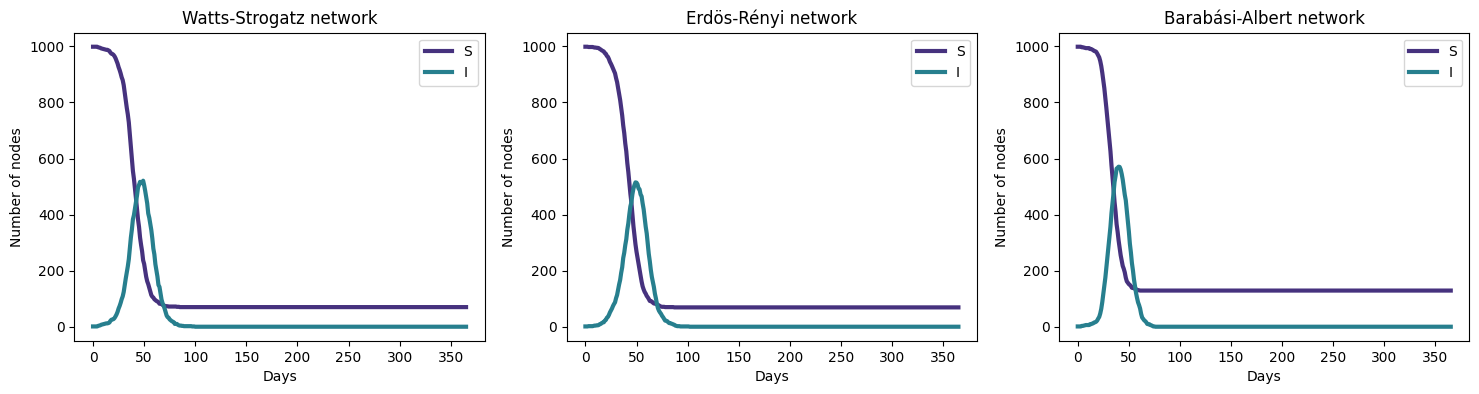

In [15]:
fig, axs = plt.subplots(1,3, figsize=(18, 4))

axs[0].set_title('Watts-Strogatz network')
axs[0].plot(simRes_WS[0], label='S', color = palette[0], lw = 3)
axs[0].plot(simRes_WS[1], label='I', color = palette[2], lw = 3)
# axs[0].plot(simRes_WS[2], label='newI', color = palette[4])
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Number of nodes')
axs[0].legend()

axs[1].set_title('Erdös-Rényi network')
axs[1].plot(simRes_ER[0], label='S', color = palette[0], lw = 3)
axs[1].plot(simRes_ER[1], label='I', color = palette[2], lw = 3)
# axs[1].plot(simRes_ER[2], label='newI', color = palette[4])
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Number of nodes')
axs[1].legend()

axs[2].set_title('Barabási-Albert network')
axs[2].plot(simRes_BA[0], label='S', color = palette[0], lw = 3)
axs[2].plot(simRes_BA[1], label='I', color = palette[2], lw = 3)
# axs[2].plot(simRes_BA[2], label='newI', color = palette[4])
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Number of nodes')
axs[2].legend()

plt.show()

In [16]:
N = 10000 # Population (Number of nodes)
K = 5 # Half of the desired average degree
wsG = ig.Graph.Watts_Strogatz(dim=1, size=N, nei=K, p=0.5)
erG = ig.Graph.Erdos_Renyi(N, m=K*N)
baG = ig.Graph.Barabasi(N, m=K)
nitInfec = 1             # Number of infected nodes at the start of the simulation
beta = 0.022              # Infection probability from infected node to susceptible node
time = 365                # Total time for simulation

In [17]:
%%time

rep = 100

allRep_WS = []
allRep_ER = []
allRep_BA = []

meanS_WS = np.zeros(time+1)
meanS_ER = np.zeros(time+1)
meanS_BA = np.zeros(time+1)

meanI_WS = np.zeros(time+1)
meanI_ER = np.zeros(time+1)
meanI_BA = np.zeros(time+1)

meanNewI_WS = np.zeros(time+1)
meanNewI_ER = np.zeros(time+1)
meanNewI_BA = np.zeros(time+1)

for i in range(rep):
    simRes_WS = simEpi(wsG, time, initInfec, beta)
    simRes_ER = simEpi(erG, time, initInfec, beta)
    simRes_BA = simEpi(baG, time, initInfec, beta)

    meanS_WS += np.array(simRes_WS[0])
    meanS_ER += np.array(simRes_ER[0])
    meanS_BA += np.array(simRes_BA[0])
    
    meanI_WS += np.array(simRes_WS[1])
    meanI_ER += np.array(simRes_ER[1])
    meanI_BA += np.array(simRes_BA[1])
    
    meanNewI_WS += np.array(simRes_WS[2])
    meanNewI_ER += np.array(simRes_ER[2])
    meanNewI_BA += np.array(simRes_BA[2])

    allRep_WS.append(simRes_WS)
    allRep_ER.append(simRes_ER)
    allRep_BA.append(simRes_BA)

    wsG = ig.Graph.Watts_Strogatz(dim=1, size=N, nei=K, p=0.5)
    erG = ig.Graph.Erdos_Renyi(N, m=K*N)
    baG = ig.Graph.Barabasi(N, m=K)

meanS_WS /= rep
meanS_ER /= rep
meanS_BA /= rep

meanI_WS /= rep
meanI_ER /= rep
meanI_BA /= rep

meanNewI_WS /= rep
meanNewI_ER /= rep
meanNewI_BA /= rep

CPU times: user 7min 51s, sys: 0 ns, total: 7min 51s
Wall time: 7min 51s


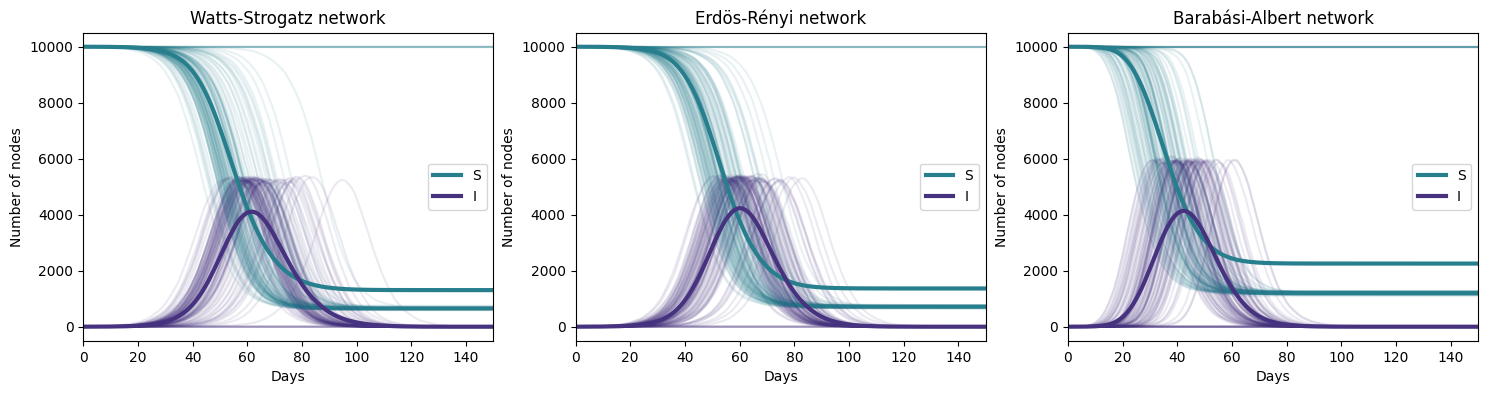

In [18]:
fig, axs = plt.subplots(1,3, figsize=(18, 4))

for r in range(rep):
    resWS = allRep_WS[r]
    axs[0].plot(resWS[0], color = palette[2], alpha = 0.1)
    axs[0].plot(resWS[1], color = palette[0], alpha = 0.1)
    
    resER = allRep_ER[r]
    axs[1].plot(resER[0], color = palette[2], alpha = 0.1)
    axs[1].plot(resER[1], color = palette[0], alpha = 0.1)
    
    resBA = allRep_BA[r]
    axs[2].plot(resBA[0], color = palette[2], alpha = 0.1)
    axs[2].plot(resBA[1], color = palette[0], alpha = 0.1)
    
axs[0].set_title('Watts-Strogatz network')
axs[0].plot(meanS_WS, label='S', color = palette[2], lw = 3)
axs[0].plot(meanI_WS, label='I', color = palette[0], lw = 3)
axs[0].set_xlabel('Days')
axs[0].set_ylabel('Number of nodes')
axs[0].legend()
axs[0].set_xlim(0,150)

axs[1].set_title('Erdös-Rényi network')
axs[1].plot(meanS_ER, label='S', color = palette[2], lw = 3)
axs[1].plot(meanI_ER, label='I', color = palette[0], lw = 3)
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Number of nodes')
axs[1].legend()
axs[1].set_xlim(0,150)

axs[2].set_title('Barabási-Albert network')
axs[2].plot(meanS_BA, label='S', color = palette[2], lw = 3)
axs[2].plot(meanI_BA, label='I', color = palette[0], lw = 3)
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Number of nodes')
axs[2].legend()
axs[2].set_xlim(0,150)

plt.savefig('simulations.pdf')
plt.show()